# 0.2 Merging users YOLO predictions (u1,u2 and u3) in a csv file

Because of the image processing process we have obtained different prediction .txt files from different users. First of all, we have to merge all this information in a format able to work easylly with this data. For this reason we are going to merge all this information in a .csv file able to be open by pandas. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
import os
import re
sns.set()

We colect all data from u1 in raw data folder:

In [2]:
import glob2

root = 'data/raw_yolo_u1/raw_data/'
list_files_u1 = glob2.glob(root +'/*.txt')

We check that the number of files is the same that the number of imatges that we have for this user:

In [3]:
print len(list_files_u1)

37140


## Objects detected concurrency for u1

Then we count how many times this unique tags apears in u1 image predictions:

In [4]:
# count the appearance of a unique tags for user 1
u1_data={}
threshold = 0.9 # this is the prob threshold
for fname in list_files_u1:
    
    f= open(fname,'r+')
    txt = f.readlines()
    f.close()
    
    for line in txt[1:]:
        
        tag_name,perc_str  = line.split(': ')
        perc =float(int(perc_str[0:2])/100.0)
      
        if perc >= threshold: # select only tag names with a certain percentage threshold
            if tag_name in u1_data:#check if key exist in dictionary
                u1_data[tag_name]+=1
            else:
                u1_data[tag_name]=1
                    
print u1_data,len(u1_data)

{'fork': 1, 'toilet': 2, 'clock': 1, 'car': 11, 'laptop': 312, 'cup': 16, 'bed': 3, 'person': 980, 'book': 36, 'zebra': 2, 'parking meter': 1, 'keyboard': 7, 'diningtable': 1, 'tvmonitor': 204, 'cell phone': 29, 'mouse': 3, 'chair': 11, 'refrigerator': 5} 18


Afterthat we filter this data to obtain only those tags which have a number of occurences above a a threshold number (in this cas threshols is equal to 1): 

In [5]:
u1_data_filter={}

for k,v in u1_data.items():
    if v >= 1 : # filter out only nº ocurrences large or equal than this value
        u1_data_filter[k]=v
        
print u1_data_filter,len(u1_data_filter)

{'fork': 1, 'toilet': 2, 'cup': 16, 'refrigerator': 5, 'car': 11, 'laptop': 312, 'clock': 1, 'bed': 3, 'person': 980, 'book': 36, 'zebra': 2, 'parking meter': 1, 'keyboard': 7, 'tvmonitor': 204, 'cell phone': 29, 'mouse': 3, 'chair': 11, 'diningtable': 1} 18


Now we are to organize this data to more concurrent objects to less to try to visualy analize this data:

In [7]:
import operator

sorted_u1_filter = sorted(u1_data_filter.items(), key=operator.itemgetter(1),reverse =True)
print sorted_u1_filter

x1,y1 = zip(*sorted_u1_filter)

print x1
print y1

[('person', 980), ('laptop', 312), ('tvmonitor', 204), ('book', 36), ('cell phone', 29), ('cup', 16), ('car', 11), ('chair', 11), ('keyboard', 7), ('refrigerator', 5), ('bed', 3), ('mouse', 3), ('toilet', 2), ('zebra', 2), ('fork', 1), ('clock', 1), ('parking meter', 1), ('diningtable', 1)]
('person', 'laptop', 'tvmonitor', 'book', 'cell phone', 'cup', 'car', 'chair', 'keyboard', 'refrigerator', 'bed', 'mouse', 'toilet', 'zebra', 'fork', 'clock', 'parking meter', 'diningtable')
(980, 312, 204, 36, 29, 16, 11, 11, 7, 5, 3, 3, 2, 2, 1, 1, 1, 1)


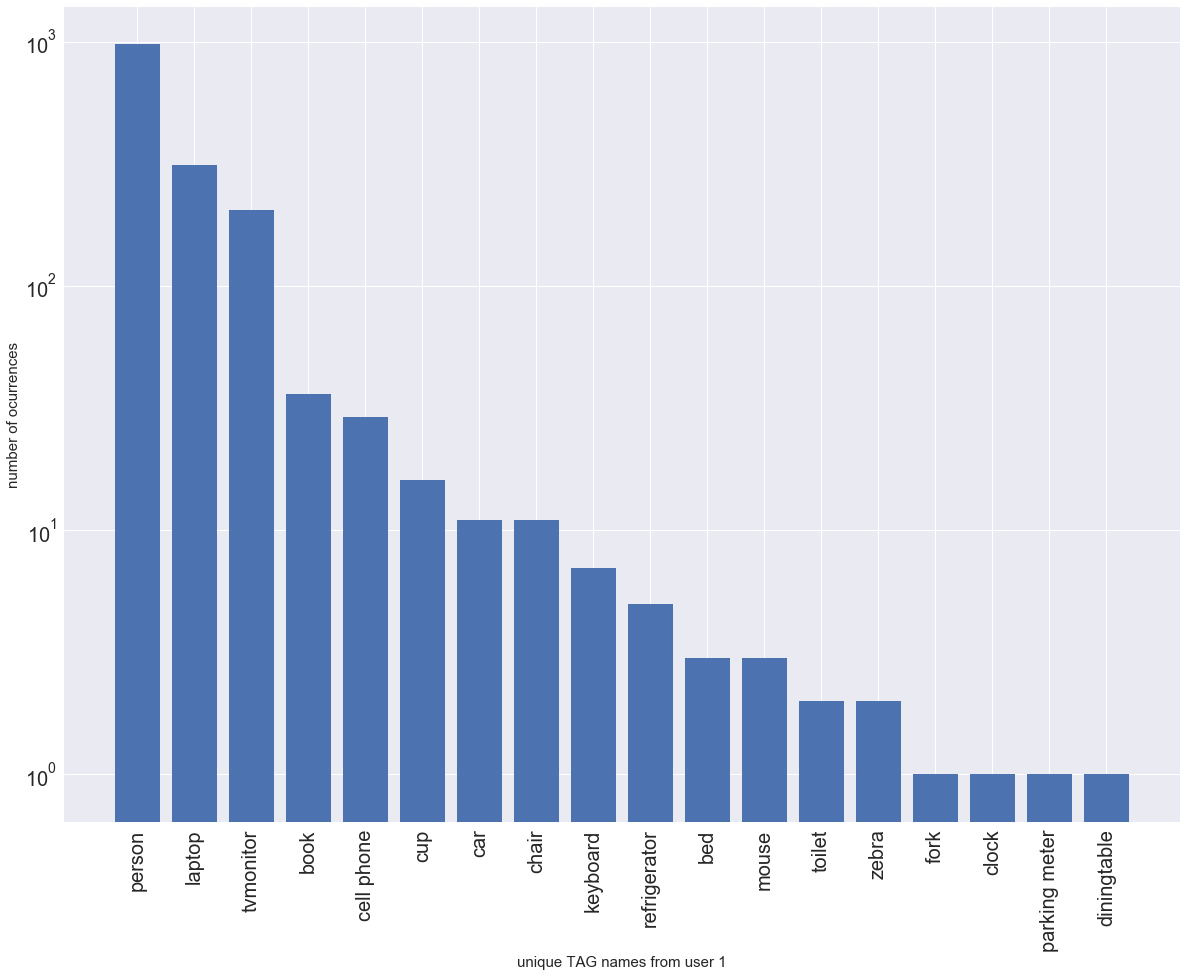

In [8]:
x_n = np.arange(len(x1))

plt.figure(figsize=(20,15))
plt.xticks(fontsize=14, rotation=90)
plt.tick_params(labelsize=20)

plt.xticks(x_n, x1,rotation= 'vertical')

plt.bar(x_n, y1, log= True)
plt.xlabel('unique TAG names from user 1',fontsize = 15)
plt.ylabel('number of ocurrences',fontsize = 15)
plt.show()

We made the same operations with u2 and u3 but in this case files have a quiete different structure.

## Objects detected concurrency for u2

In [9]:
root = 'data/raw_yolo_u2/'
list_files_u2 = glob2.glob(root +'/*.txt')

print list_files_u2,len(list_files_u2)

['data/raw_yolo_u2/u2_2015-04-26_2015-04-28_predict.txt', 'data/raw_yolo_u2/u2_2015-04-24_predict.txt', 'data/raw_yolo_u2/u2_2015-05-03_predict.txt', 'data/raw_yolo_u2/u2_2015-04-29_05-01_predict.txt', 'data/raw_yolo_u2/2015-04-22_predict.txt', 'data/raw_yolo_u2/u2_2015-05-05_2015-05-07_predict.txt', 'data/raw_yolo_u2/2015-04-21_predict.txt', 'data/raw_yolo_u2/u2_2015-06-18_2015-06-19_predict.txt', 'data/raw_yolo_u2/u2_2015-04-25_predict.txt', 'data/raw_yolo_u2/u2_2015-05-04_predict.txt', 'data/raw_yolo_u2/u2_2015-06-20_2015-06-21_predict.txt', 'data/raw_yolo_u2/u2_2015-05-02_predict.txt', 'data/raw_yolo_u2/2015-04-20_predict.txt', 'data/raw_yolo_u2/2015-04-23_predict.txt', 'data/raw_yolo_u2/u2_2015-05-08_2015-06-17_predict.txt'] 15


In [10]:
# count the appearance of a unique tag
u2_data={}
threshold = 0.9
for i in range(len(list_files_u2)):
    file= open(list_files_u2[i],'r+')
    txt = file.read()
    file.close()
    txt = txt.split('\n')
    N_lines= len(txt) #total number of lines in each txt file
    counter = 1   
    for line in txt:
        pattern = re.compile(r'[b]\w+(.jpg|\s\(\d\).jpg)')
        res = re.search(pattern,line)
        if res:
            data= res.group()            
        else:
            if counter < N_lines: 
                items = line.split(': ')
                tag_name= items[0]
                perc =float(items[1][0:2])/100.0
                if perc >= threshold: # select only tag names with a certain percentage threshold
                    if tag_name in u2_data:#check if key exist in dictionary
                        u2_data[tag_name]+=1
                    else:
                        u2_data[tag_name]=1
        counter +=1 
        
print u2_data,len(u2_data)

{'toilet': 2, 'umbrella': 1, 'bed': 2, 'cup': 13, 'car': 20, 'laptop': 560, 'keyboard': 75, 'bowl': 1, 'microwave': 3, 'cat': 1, 'person': 400, 'book': 4, 'refrigerator': 3, 'aeroplane': 1, 'bus': 1, 'tvmonitor': 860, 'cell phone': 12, 'sofa': 1, 'chair': 2, 'diningtable': 5, 'sink': 1} 21


In [11]:
# filter data when the nº of occurences is below a certain threshold
u2_data_filter={}

for k,v in u2_data.items():
    if v >= 1 : # filter out only nº ocurrences large or equal than this value
        u2_data_filter[k]=v
        
print u2_data_filter,len(u2_data_filter)

{'toilet': 2, 'diningtable': 5, 'umbrella': 1, 'cup': 13, 'car': 20, 'laptop': 560, 'bowl': 1, 'bed': 2, 'cat': 1, 'person': 400, 'book': 4, 'microwave': 3, 'aeroplane': 1, 'keyboard': 75, 'bus': 1, 'tvmonitor': 860, 'cell phone': 12, 'sofa': 1, 'chair': 2, 'refrigerator': 3, 'sink': 1} 21


Before filtering we obtain that there are 79 different (threshol = 0) tags for user 2 void to avoid non convidence prediction we filter using a treshold = 0.9 and finally we obtaing 21 different tags (objects detected) in u2 images.

In [12]:
# organize the data from more accurences to less ocurrences
sorted_u2_filter = sorted(u2_data_filter.items(), key=operator.itemgetter(1),reverse =True)
print sorted_u2_filter

x2,y2 = zip(*sorted_u2_filter)

print x2, len(x2)

[('tvmonitor', 860), ('laptop', 560), ('person', 400), ('keyboard', 75), ('car', 20), ('cup', 13), ('cell phone', 12), ('diningtable', 5), ('book', 4), ('microwave', 3), ('refrigerator', 3), ('toilet', 2), ('bed', 2), ('chair', 2), ('umbrella', 1), ('bowl', 1), ('cat', 1), ('aeroplane', 1), ('bus', 1), ('sofa', 1), ('sink', 1)]
('tvmonitor', 'laptop', 'person', 'keyboard', 'car', 'cup', 'cell phone', 'diningtable', 'book', 'microwave', 'refrigerator', 'toilet', 'bed', 'chair', 'umbrella', 'bowl', 'cat', 'aeroplane', 'bus', 'sofa', 'sink') 21


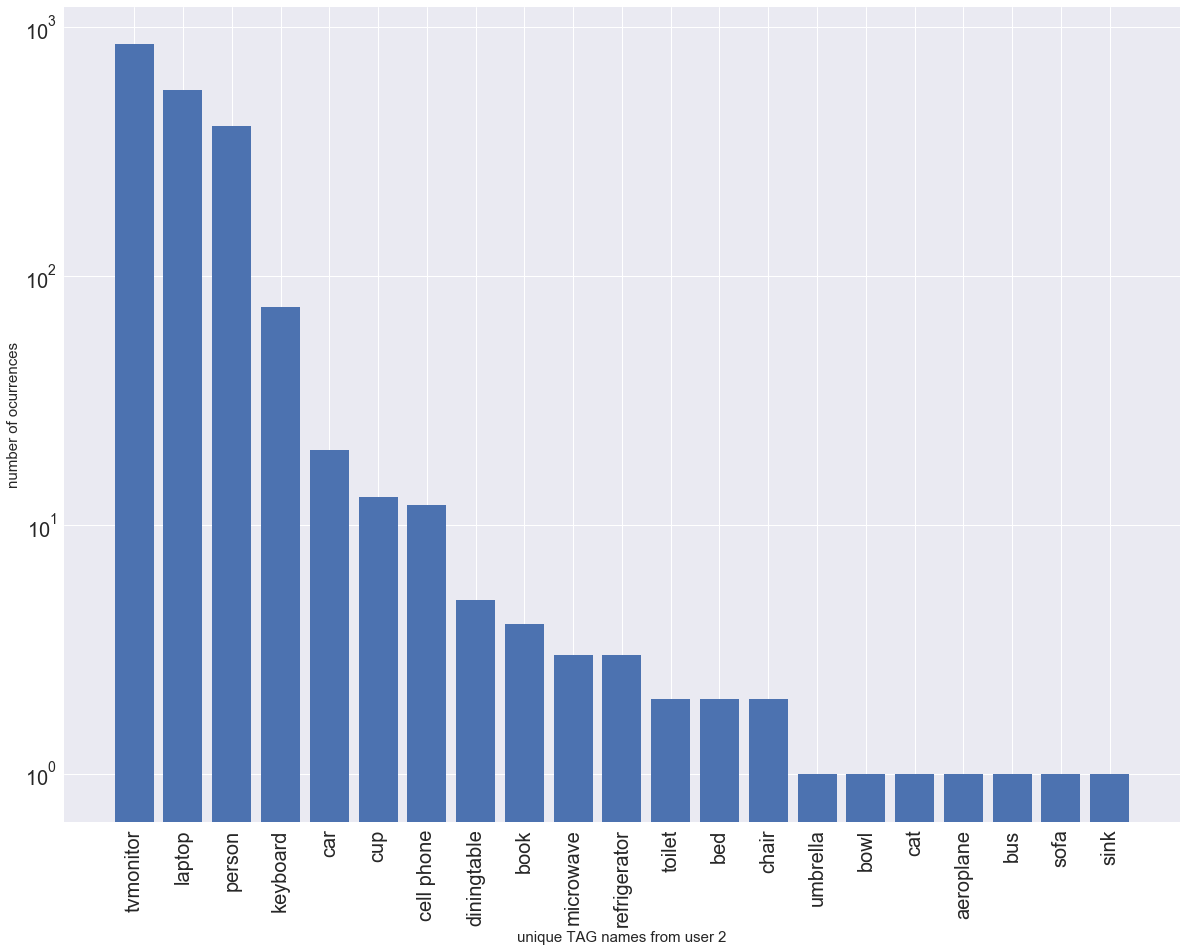

In [13]:
x_n = np.arange(len(x2))

plt.figure(figsize=(20,15))
plt.tick_params(labelsize=20)

plt.xticks(x_n, x2,rotation= 'vertical')
plt.bar(x_n, y2, log= True)
plt.xlabel('unique TAG names from user 2',fontsize = 15)
plt.ylabel('number of ocurrences',fontsize = 15)
plt.show()

## Checking if strange tags could be real

If we take a look we can see non very common tags (but most of them we have already filted them). But we are just curious about tag 'umbrella' that only appears once.  
  
That way is who we can find an image containing a determinate tag. 

In [24]:
tag_exep=['umbrella']
get_exceptions = []
root = 'data/'
for files in list_files_u2:
    with open(files) as fichero:
        for line in fichero.readlines():
            stripped= line.split(': ')
            if 'D:/' in stripped[0]:
                date= stripped[0].split('/')[4].split('\\')[0]
                filename = stripped[0].split('/')[4].split('\\')[1]
                if len(date) > 10:
                    date= stripped[0].split('/')[4].split('\\')[1]
                    filename = stripped[0].split('/')[4].split('\\')[2]
            else:               
                tag= stripped[0]
                if tag in tag_exep:                    
                    perc =float(stripped[1][0:2])/100 
                    if perc >= threshold:
                        get_exceptions.append('u2/'+date+'/'+filename)
                                           
print get_exceptions                       

['u2/2015-06-19/b00003338_21i7lf_20150619_092943e.jpg']


images/u2/2015-06-19/b00003338_21i7lf_20150619_092943e.jpg


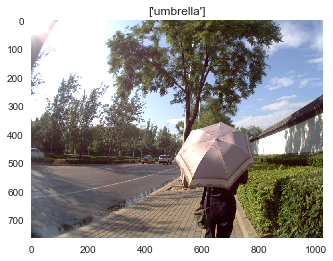

In [26]:
%matplotlib inline

import random

root_file = 'images/'
sample = random.choice(get_exceptions)
image_path = root_file + sample
print image_path
img = plt.imread(image_path)
plt.title(tag_exep)
plt.grid('off')
plt.imshow(img)

## Objects detected concurrency for u3

In [29]:
root = './data/raw_yolo_u3/'
files = os.listdir(root)
list_files_u3 = []
for i in range(len(files)):
    list_files_u3.append(root+files[i])  

u3_data={}
threshold = 0.9
for i in range(len(list_files_u3)):
    file= open(list_files_u3[i],'r+')
    txt = file.read()
    file.close()
    txt = txt.split('\n')
    N_lines= len(txt) #total number of lines in each txt file
    counter = 1   
    for line in txt:
        pattern = re.compile(r'[b]\w+(.jpg|\s\(\d\).jpg)')
        res = re.search(pattern,line)
        if res:
            data= res.group()            
        else:
            if counter < N_lines: 
                items = line.split(': ')
                tag_name= items[0]
                perc =float(items[1][0:2])/100.0
                if perc >= threshold: # select only tag names with a certain percentage threshold
                    if tag_name in u3_data:#check if key exist in dictionary
                        u3_data[tag_name]+=1 # add ocurrence
                    else:
                        u3_data[tag_name]=1
        counter +=1 
        
print u3_data,len(u3_data)

{'umbrella': 1, 'cup': 4, 'bus': 3, 'laptop': 48, 'bowl': 2, 'bed': 1, 'person': 456, 'train': 5, 'diningtable': 1, 'car': 18, 'tvmonitor': 2, 'chair': 1, 'cell phone': 9, 'refrigerator': 1} 14


In [30]:
u3_data_filter={}

for k,v in u3_data.items():
    if v >= 1 : # filter out only nº ocurrences large or equal than this value
        u3_data_filter[k]=v
print u3_data_filter,len(u3_data_filter)

{'umbrella': 1, 'cup': 4, 'bus': 3, 'laptop': 48, 'bowl': 2, 'bed': 1, 'person': 456, 'train': 5, 'refrigerator': 1, 'car': 18, 'tvmonitor': 2, 'chair': 1, 'cell phone': 9, 'diningtable': 1} 14


In [31]:
# organize the data from more accurences to less ocurrences
sorted_u3_filter = sorted(u3_data_filter.items(), key=operator.itemgetter(1),reverse =True)
print sorted_u2_filter

x3,y3 = zip(*sorted_u3_filter)

print x3, len(x3)

[('tvmonitor', 860), ('laptop', 560), ('person', 400), ('keyboard', 75), ('car', 20), ('cup', 13), ('cell phone', 12), ('diningtable', 5), ('book', 4), ('microwave', 3), ('refrigerator', 3), ('toilet', 2), ('bed', 2), ('chair', 2), ('umbrella', 1), ('bowl', 1), ('cat', 1), ('aeroplane', 1), ('bus', 1), ('sofa', 1), ('sink', 1)]
('person', 'laptop', 'car', 'cell phone', 'train', 'cup', 'bus', 'bowl', 'tvmonitor', 'umbrella', 'bed', 'refrigerator', 'chair', 'diningtable') 14


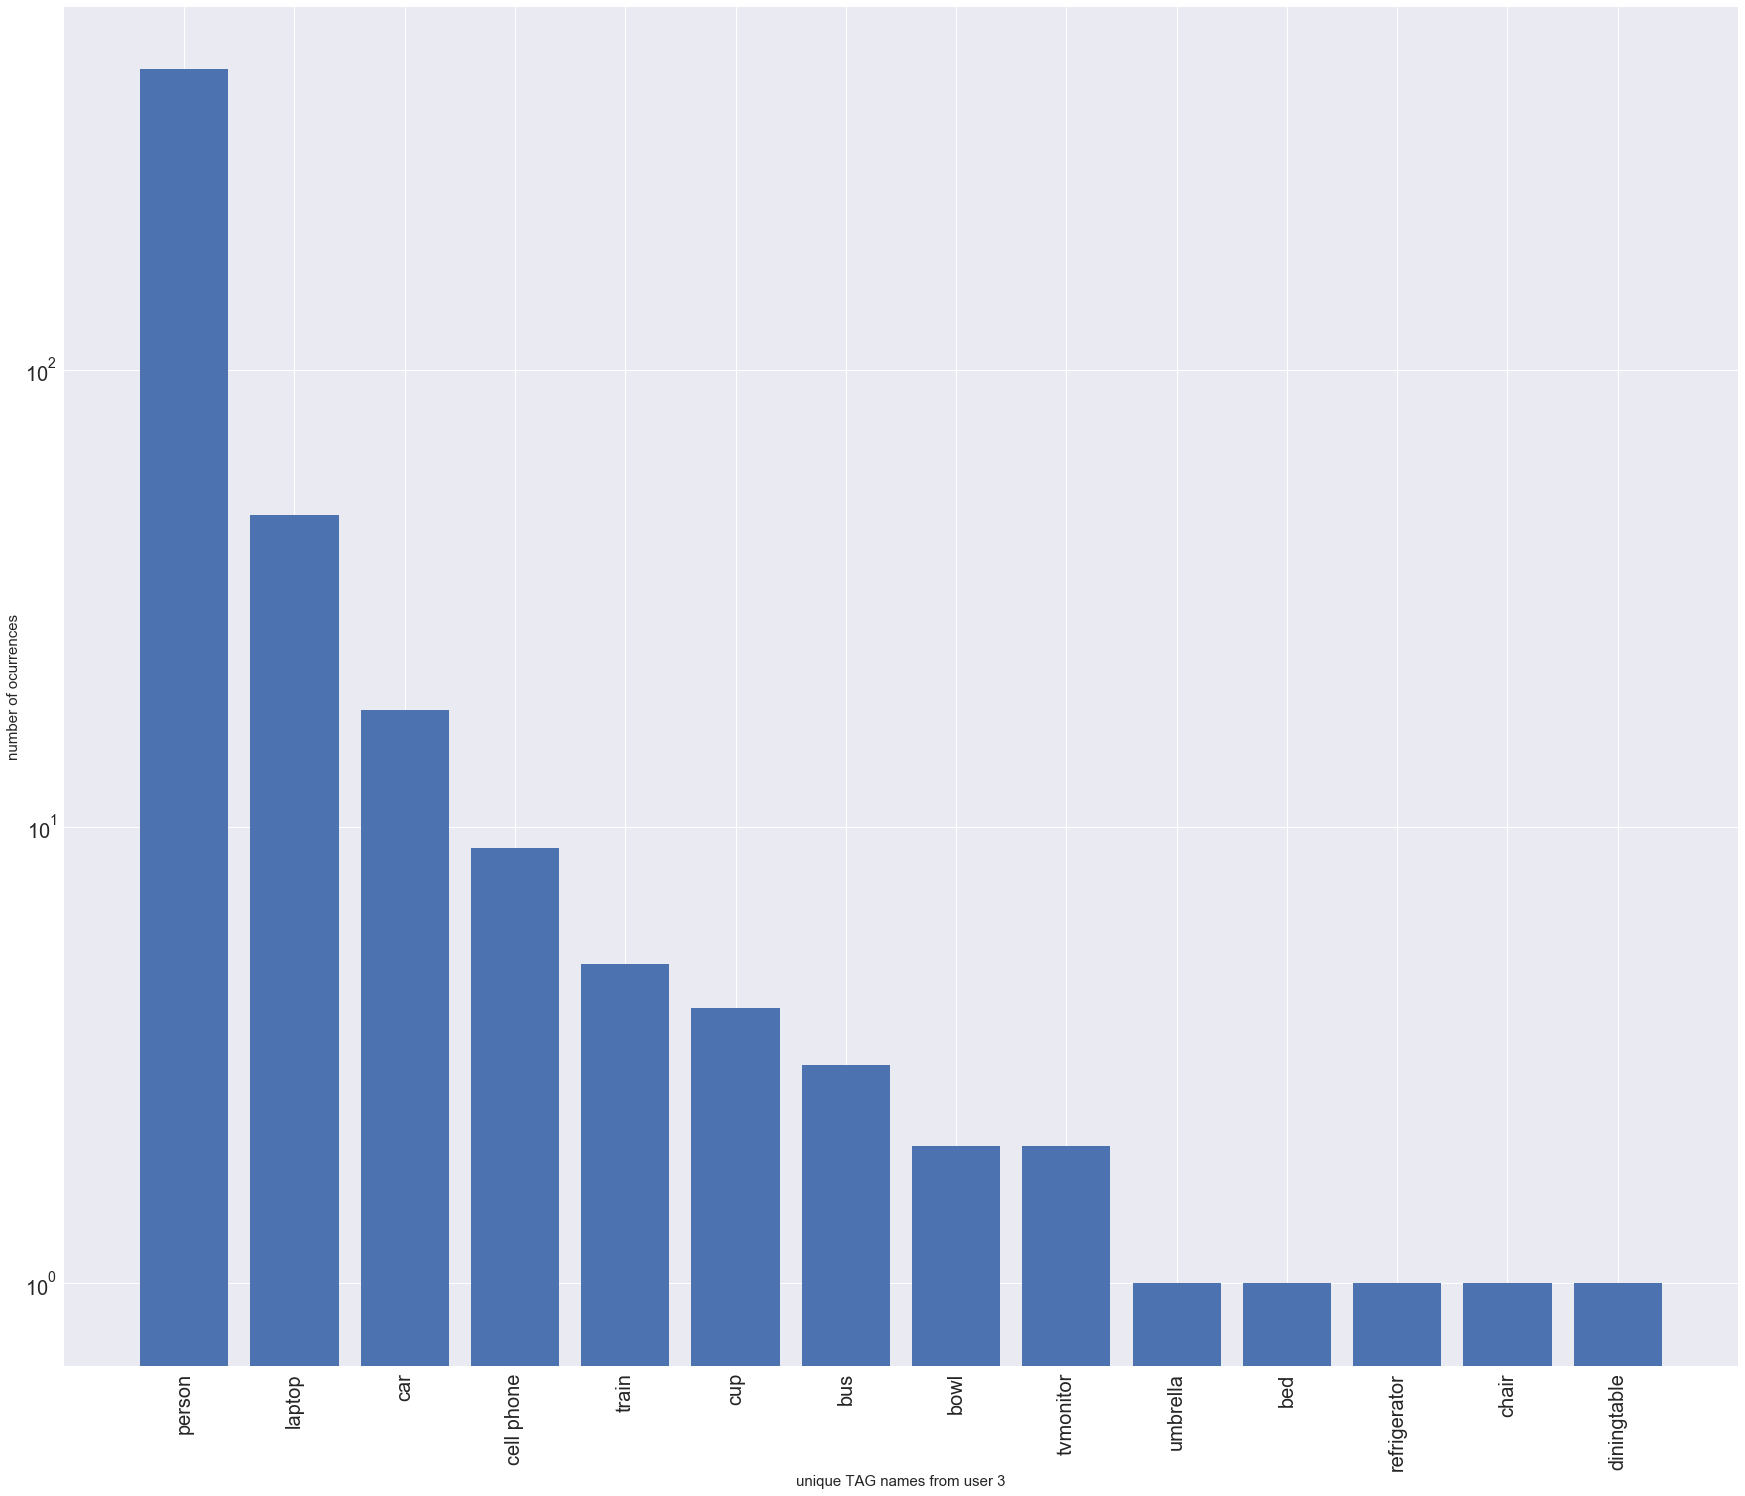

In [32]:
x_n = np.arange(len(x3))

plt.figure(figsize=(30,25))
plt.tick_params(labelsize=20)

plt.xticks(x_n, x3,rotation= 'vertical')
plt.bar(x_n, y3, log= True)
plt.xlabel('unique TAG names from user 3',fontsize=15)
plt.ylabel('number of ocurrences',fontsize=15)
plt.show()

## Merging all users unique tags

In [33]:
u_all= x1+x2+x3
u_tags = list(set(u_all))

print u_tags
print len(u_tags)

['toilet', 'laptop', 'zebra', 'keyboard', 'tvmonitor', 'chair', 'mouse', 'cup', 'bowl', 'microwave', 'book', 'refrigerator', 'fork', 'umbrella', 'aeroplane', 'bus', 'train', 'sink', 'cell phone', 'diningtable', 'car', 'clock', 'bed', 'cat', 'person', 'parking meter', 'sofa']
27


This is the list of ALL different TAGS available for ALL users together:

In [34]:
tags_filter= ['person', 'laptop', 'tvmonitor', 'book', 'cell phone', 'cup', 'car', 'chair', 'keyboard', 'refrigerator', 'bed', 'mouse', 'toilet', 'zebra', 'fork', 'clock', 'parking meter', 'diningtable', 'microwave', 'umbrella', 'bowl', 'cat', 'aeroplane', 'bus', 'sofa', 'sink', 'train']

## Obtaining .csv files from every user images detected objects 

In [35]:
users=[]
dates=[]
image_name=[]
results=[]

for files in list_files_u1:
    with open(files) as fichero:

        appeared_values=np.zeros(len(u_tags))
        #appeared_values[appeared_values == 0] = np.nan #replace zeros with a nan the first time
        for line in fichero.readlines():
            stripped= line.split(': ')
            if '/home' in stripped[0]:
                user =stripped[0].split('/')[5]
                date =stripped[0].split('/')[6]
                filename =stripped[0].split('/')[7]
                users.append(user)
                dates.append(date)
                image_name.append(filename)
                
            else:
                #print stripped
                tag=stripped[0]
                pred=float(stripped[1][:-2])/100.0
                #print tag,pred
                if tag in u_tags:
                    index=u_tags.index(tag) #locate index of the tag
                    if appeared_values[index]<pred: #asign new value if current one is higher
                        appeared_values[index]=pred
        results.append(appeared_values)# apend values

In [39]:
column_names = ['user', 'date','filename']
for i in u_tags:
    column_names.append(i)

### Creating .csv for u1:

In [38]:
filename='data/u1_data_filter.csv'
f=open(filename,'w+')
N = len(column_names)
for i,item in enumerate(column_names):
    if i !=(N-1):
        f.write(item+';')
    else:
        f.write(item)
f.write('\n')
    
for i in range(len(results)):
    #f.write(users[i])
    f.write(users[i]+','+dates[i]+','+image_name[i])
    for j in results[i]:
        f.write(';'+str(j))
    f.write('\n')
f.close()

### Creating .csv for u2:

In [46]:
root = 'data/raw_yolo_u2/'
files = os.listdir(root)
list_files_u2 = []
for i in range(len(files)):
    list_files_u2.append(root+files[i])

users=[]
dates=[]
image_name=[]
results=[]
for files in list_files_u2:
    with open(files) as fichero:
        appeared_values=np.zeros(len(u_tags))
        appeared_values[appeared_values == 0] = np.nan #replace zeros with a nan the first time
        for line in fichero.readlines():
            stripped= line.split(': ')
            if 'D:/' in stripped[0]:                
                user =stripped[0].split('/')[3]
                users.append(user)
                date =stripped[0].split('/')[4].split('\\')[0]
                filename =stripped[0].split('/')[4].split('\\')[1]
                if len(date) == 10:
                    date =stripped[0].split('/')[4].split('\\')[0]
                    filename =stripped[0].split('/')[4].split('\\')[1]
                    dates.append(date)
                    image_name.append(filename)
                else:
                    date =stripped[0].split('/')[4].split('\\')[1]
                    filename =stripped[0].split('/')[4].split('\\')[2]
                    dates.append(date)
                    image_name.append(filename)
                if np.isnan(appeared_values).any():  #check if its nan
                    appeared_values=np.zeros(len(u_tags))# reset to zero
                else:
                    results.append(appeared_values)# apend values
                    appeared_values=np.zeros(len(u_tags))# reset to zero
            else:
                tag=stripped[0]
                pred=float(stripped[1][:-4])/100.0
                
                if tag in u_tags:
                    index=u_tags.index(tag)#locate index of the tag
                    if appeared_values[index]<pred: #asign new value if current is higher
                        appeared_values[index]=pred

                else: # if no tag is found set all values to zero
                    appeared_values=np.zeros(len(u_tags))# reset to zero
        appeared_values=np.zeros(len(u_tags))# reset to zero
        results.append(appeared_values)# apend values

In [47]:
filename='data/u2_data.csv'

f=open(filename,'w+')
N = len(column_names)
for i,item in enumerate(column_names):
    if i !=(N-1):
        f.write(item+';')
    else:
        f.write(item)
f.write('\n')

for i in range(len(results)):
    f.write(users[i]+','+dates[i]+','+image_name[i])
    for j in results[i]:
        f.write(';'+str(j))
    f.write('\n')
f.close()

### Creating .csv for u3:

In [52]:
root = './data/raw_yolo_u3/'
files = os.listdir(root)
list_files_u3 = []
for i in range(len(files)):
    list_files_u3.append(root+files[i])

users=[]
dates=[]
image_name=[]
results=[]
for files in list_files_u3:
    with open(files) as fichero:
        appeared_values=np.zeros(len(u_tags))
        appeared_values[appeared_values == 0] = np.nan #replace zeros with a nan the first time
        for line in fichero.readlines():
            stripped= line.split(': ')
            if 'D:/' in stripped[0]:                
                user =stripped[0].split('/')[3]
                users.append(user)
                date =stripped[0].split('/')[4].split('\\')[0]
                filename =stripped[0].split('/')[4].split('\\')[1]
                if len(date) == 10:
                    date =stripped[0].split('/')[4].split('\\')[0]
                    filename =stripped[0].split('/')[4].split('\\')[1]
                    dates.append(date)
                    image_name.append(filename)
                else:
                    date =stripped[0].split('/')[4].split('\\')[1]
                    filename =stripped[0].split('/')[4].split('\\')[2]
                    dates.append(date)
                    image_name.append(filename)
                if np.isnan(appeared_values).any():  #check if its nan
                    appeared_values=np.zeros(len(u_tags))# reset to zero
                else:
                    results.append(appeared_values)# apend values
                    appeared_values=np.zeros(len(u_tags))# reset to zero
            else:
                tag=stripped[0]
                pred=float(stripped[1][:-4])/100.0
                #print tag,pred
                if tag in u_tags:
                    index=u_tags.index(tag)#locate index of the tag
                    if appeared_values[index]<pred: #asign new value if current is higher
                        appeared_values[index]=pred

                else: # if no tag is found set all values to zero
                    appeared_values=np.zeros(len(u_tags))# reset to zero
        appeared_values=np.zeros(len(u_tags))# reset to zero
        results.append(appeared_values)# apend values

In [53]:
filename='data/u3_data.csv'
f=open(filename,'w+')
N = len(column_names)
for i,item in enumerate(column_names):
    if i !=(N-1):
        f.write(item+';')
    else:
        f.write(item)
f.write('\n')

for i in range(len(results)):
    f.write(users[i]+','+dates[i]+','+image_name[i])
    for j in results[i]:
        f.write(';'+str(j))
    f.write('\n')
f.close()

### We have succesfully generate 3 csv based on YOLO data!!!